In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Function to preprocess images
def preprocess_image(image):
    image_gray = rgb2gray(image)  # Convert to grayscale
    image_resized = resize(image_gray, (32, 32))  # Resize to 32x32
    return image_resized

In [ ]:
# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        processed_image = preprocess_image(image)
        hog_feature = hog(processed_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [ ]:
# Extract HOG features for training and testing images
X_train_hog = extract_hog_features(X_train[:5000])  # Using subset for faster computation
X_test_hog = extract_hog_features(X_test[:1000])


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

In [ ]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_hog, y_train[:5000])  # Train on subset

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = clf.predict(X_test_hog)

In [ ]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))

Accuracy: 0.446
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.49      0.46       103
           1       0.45      0.51      0.47        89
           2       0.40      0.37      0.39       100
           3       0.26      0.17      0.20       103
           4       0.43      0.48      0.45        90
           5       0.31      0.38      0.34        86
           6       0.49      0.65      0.56       112
           7       0.62      0.39      0.48       102
           8       0.53      0.52      0.52       106
           9       0.52      0.49      0.50       109

    accuracy                           0.45      1000
   macro avg       0.44      0.44      0.44      1000
weighted avg       0.45      0.45      0.44      1000



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

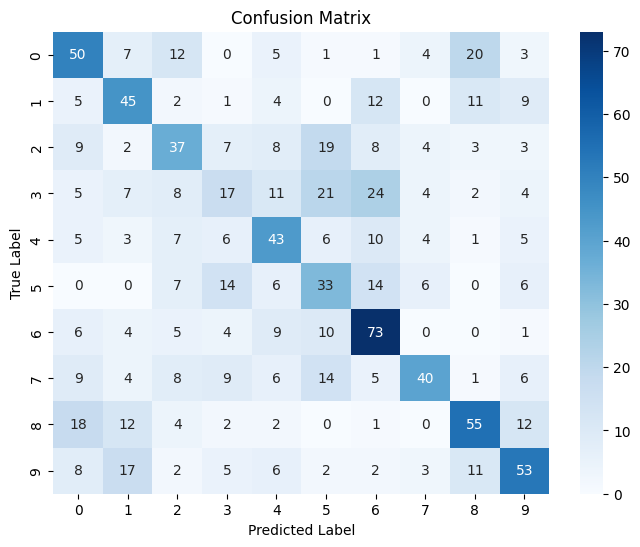

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()